In [ ]:
import pandas as pd
from google.colab import files
files.upload()

Saving Air Purifier Data.xlsx to Air Purifier Data.xlsx


{'Air Purifier Data.xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00\xca6yY\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\xd0]n\xc20\x0c\x07\xf0\x13\xec\x0eU\xdeiZ\x18\x13C\x14^\xd0N0\x0e\xe0%n\x1b\x91\x8f\xca\x0e\xa3\xdc~\xd1J6i{\x01\x1em\xcb?\xf9\xef\xcdnt\xb6\xf8Db\x13|#\xea\xb2\x12\x05z\x15\xb4\xf1]#\x0e\xefo\xb3\x95(8\x82\xd7`\x83\xc7F\\\x90\xc5n\xfb\xb4\x195\xad\xcf\xbc\xa7"\xed{^\xa7\xb2\x11}\x8c\xc3ZJV=:\xe02\x0c\xe8\xd3\xb4\r\xe4 \xa6\x92:\xa9\t\xceIvV\xce\xab\xeaE\xf2@\x08\x9a{\xc4\xb8\x9f&\xe2\xea\xc1\x03\x9a\x03\xe3\xf3\xfeM\xd7\x84\xb65\n\xf7A\x9d\x1c\xfa8!\x84\x16b\xfa\x05\xf7f\xe0\xac\xa9\x07\xaeQ=P\xfc\x01\xc6\x7f\x823\x8a\x02\x876\x96*\xb8\xeb)\xd9HB\xfd<\t8\xfe\x1a\xf5\xdd\xc8R\xbe\xca\xd5_\xc8\xdd\x14\xc7\x01\x1dO\xc3,\xb9Cz\xc8\x87\xb1&^\xbe\x93eFw\xee\x81\xb7h\x03\x1d\x81\xcb\xc8\xb88\xf8\xe3\xdd\xb1*\xc96\xb5(+l\xb1^\xde\xad\xcc\xb3"\xb7_PK\x07\x08\x07bi\x83\x05\x01\x00\x00\x07\x03\x00\x00PK\x03\x04\x14\x00\x08\x08\x08\x00\

In [ ]:
df = pd.read_excel("Air Purifier Data.xlsx")
df.head()


,Measure Category,Description,Name,Clean Air Delivery Rate (CADR)
0,Air Quality,Honeywell HEPA Air Purifier,HPA100,125
1,Air Quality,Honeywell AirGenius 4 Compact Tower with Perma...,HFD280B,75
2,Air Quality,Honeywell PowerPlus HEPA Air Purifier for Medi...,HPA3100B,125
3,Air Quality,Honeywell PowerPlus HEPA Air Purifier for Extr...,HPA3300B,275
4,Air Quality,Honeywell InSight HEPA For Medium/Large Rooms,HPA5100B,125


In [ ]:
cadr_col = df['Clean Air Delivery Rate (CADR)']
electricity_impact = 0.0
demand_savings = 0.0
e_list = []
d_list = []

for cadr in cadr_col:
  id = df['Name']
  if cadr >= 51 and cadr <= 100:
    electricity_impact = 293
    demand_savings = 0.034
  elif cadr >= 101 and cadr <= 150:
    electricity_impact = 488
    demand_savings = 0.056
  elif cadr >= 151 and cadr <= 200:
    electricity_impact = 683
    demand_savings = 0.078
  elif cadr >= 201 and cadr <= 250:
    electricity_impact = 877
    demand_savings = 0.101
  else:
    electricity_impact = 1072
    demand_savings = 0.123
  e_list.append(electricity_impact)
  d_list.append(demand_savings)

df['Electricity Impact'] = e_list
df['Demand Savings'] = d_list
result_table = df[['Description', 'Electricity Impact', 'Demand Savings']]
print(result_table)




                                         Description  Electricity Impact  \
0                        Honeywell HEPA Air Purifier                 488   
1  Honeywell AirGenius 4 Compact Tower with Perma...                 293   
2  Honeywell PowerPlus HEPA Air Purifier for Medi...                 488   
3  Honeywell PowerPlus HEPA Air Purifier for Extr...                1072   
4      Honeywell InSight HEPA For Medium/Large Rooms                 488   
5       Honeywell InSight HEPA For Extra Large Rooms                1072   
6                     LG PuriCare 360 with NanoFiber                 293   
7              Simply Conserve Tabletop Air Purifier                 293   
8  Honeywell Designer HEPA Tower for Medium/Large...                 293   

   Demand Savings  
0           0.056  
1           0.034  
2           0.056  
3           0.123  
4           0.056  
5           0.123  
6           0.034  
7           0.034  
8           0.034  


  Measure Category                                        Description  \
0      Air Quality                        Honeywell HEPA Air Purifier   
1      Air Quality  Honeywell AirGenius 4 Compact Tower with Perma...   
2      Air Quality  Honeywell PowerPlus HEPA Air Purifier for Medi...   
3      Air Quality  Honeywell PowerPlus HEPA Air Purifier for Extr...   
4      Air Quality      Honeywell InSight HEPA For Medium/Large Rooms   

        Name  Clean Air Delivery Rate (CADR)  Electricity Impact  \
0     HPA100                             125                 488   
1    HFD280B                              75                 293   
2  HPA3100B                              125                 488   
3   HPA3300B                             275                1072   
4   HPA5100B                             125                 488   

   Demand Savings  
0           0.056  
1           0.034  
2           0.056  
3           0.123  
4           0.056  
Length of Names: 9
Length of Ele

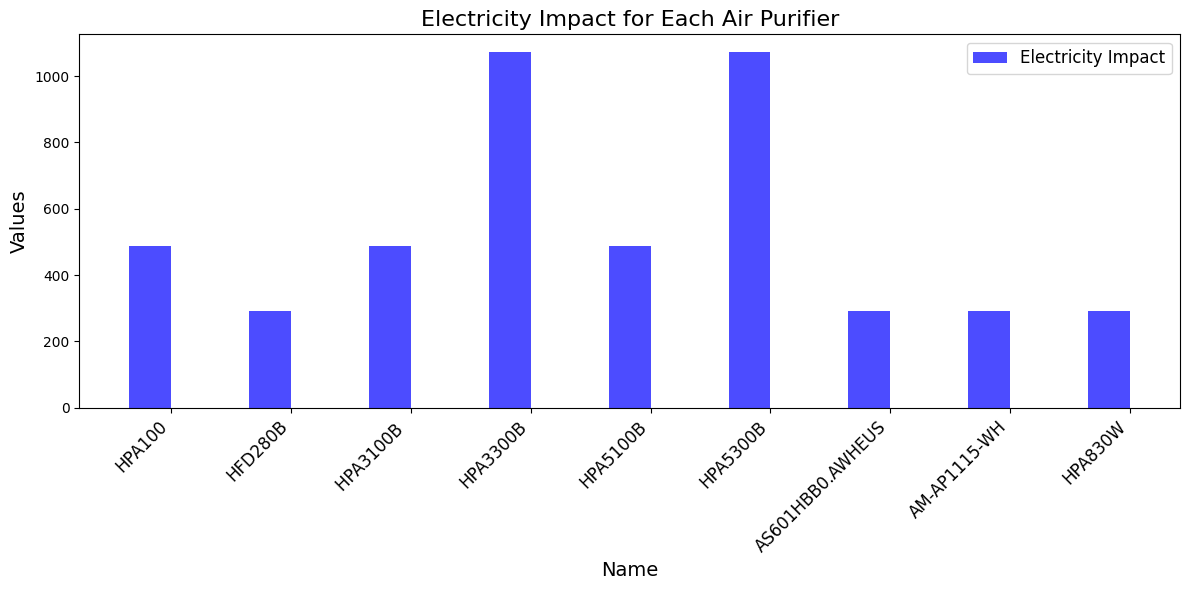

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Debugging: Print the first few rows of the DataFrame to verify data
print(df.head())

# Extract data
names = df['Name']
electricity_impact = df['Electricity Impact']

# Debugging: Print lengths of arrays to ensure they match
print("Length of Names:", len(names))
print("Length of Electricity Impact:", len(electricity_impact))
print("Length of Demand Savings:", len(demand_savings))

# Set the bar width and positions
bar_width = 0.35
indices = np.arange(len(names))

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(indices, electricity_impact, bar_width, label='Electricity Impact', color='blue', alpha=0.7)


# Add labels, title, and legend
plt.xlabel('Name', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Electricity Impact for Each Air Purifier', fontsize=16)
plt.xticks(indices + bar_width / 2, names, rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()